# FACTOR ANALYSIS ASSIGNMENT
## CLIENT 3: College / University Segmentation
### MARISSA MCKEE ADTA 5120

You have been hired as a consultant by three clients to perform several analyses. Complete the brief reports to the client in a concise professional manner. It is suggested that you also include an appendix for your supervisor with the relevant SPSS output outlining your findings and analysis. Your supervisor will also like to see the SPSS *.spv file showing your executed SPSS analysis.

#### Client #3:  College / University Segmentation (33 points)

A manager in the education industry would like to determine how his firm should segment colleges and universities into distinct marketing segments. Using the data in the file “college_scorecard_data.sav,” compile a report outlining your analysis and findings. Attempt to give a name to the types of schools that are in each of the groups.

In [1]:
import pandas as pd
import pyreadstat
from sklearn.datasets import load_iris
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo

In [2]:
# Read college_scorecard_data.sav 
df, meta = pyreadstat.read_sav("college_scorecard_data.sav")
df.head()

,Ownership,FamilyIncome,GradRate,PctFtFaculty,AdmissionRate,SATAVG,UndergradPop,FacultySalary,LoanCurrent3yr,PCTFedLoan,DEBT,CostToAttend,PartTime_students,Income_8yr
0,1.0,35492.88814,0.2875,0.8099,0.4726,851.0,4483.0,6441.0,0.460419,0.6991,10057.5,13242.0,0.0749,28200.000087
1,1.0,49514.71992,0.3958,0.9204,0.8357,1107.0,10265.0,8634.0,0.646145,0.4493,8332.0,16955.0,0.2327,38199.999824
2,1.0,50687.20304,0.4755,0.6630,0.7209,1145.0,5956.0,7914.0,0.707648,0.4258,9000.0,16876.0,0.2258,44600.000089
3,1.0,28696.60602,0.2174,0.5907,0.4625,805.0,4638.0,6567.0,0.398134,0.8514,8250.0,14000.0,0.0910,25900.000060
4,1.0,75718.58599,0.6593,0.7402,0.5870,1122.0,23296.0,8160.0,0.708560,0.3109,11625.0,20496.0,0.0749,40199.999815


In [3]:
# View the features in the dataframe
df.columns

Index(['Ownership', 'FamilyIncome', 'GradRate', 'PctFtFaculty',
       'AdmissionRate', 'SATAVG', 'UndergradPop', 'FacultySalary',
       'LoanCurrent3yr', 'PCTFedLoan', 'DEBT', 'CostToAttend',
       'PartTime_students', 'Income_8yr'],
      dtype='object')

In [4]:
# Check for nulls
df.isnull().any()

Ownership            False
FamilyIncome         False
GradRate             False
PctFtFaculty         False
AdmissionRate        False
SATAVG               False
UndergradPop         False
FacultySalary        False
LoanCurrent3yr       False
PCTFedLoan           False
DEBT                 False
CostToAttend         False
PartTime_students    False
Income_8yr           False
dtype: bool

In [5]:
# Drop rows with missing values
df.dropna(inplace=True)

In [6]:
# Sanity check 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1230 entries, 0 to 1229
Data columns (total 14 columns):
Ownership            1230 non-null float64
FamilyIncome         1230 non-null float64
GradRate             1230 non-null float64
PctFtFaculty         1230 non-null float64
AdmissionRate        1230 non-null float64
SATAVG               1230 non-null float64
UndergradPop         1230 non-null float64
FacultySalary        1230 non-null float64
LoanCurrent3yr       1230 non-null float64
PCTFedLoan           1230 non-null float64
DEBT                 1230 non-null float64
CostToAttend         1230 non-null float64
PartTime_students    1230 non-null float64
Income_8yr           1230 non-null float64
dtypes: float64(14)
memory usage: 144.1 KB


In [7]:
# View output 
df.head()

,Ownership,FamilyIncome,GradRate,PctFtFaculty,AdmissionRate,SATAVG,UndergradPop,FacultySalary,LoanCurrent3yr,PCTFedLoan,DEBT,CostToAttend,PartTime_students,Income_8yr
0,1.0,35492.88814,0.2875,0.8099,0.4726,851.0,4483.0,6441.0,0.460419,0.6991,10057.5,13242.0,0.0749,28200.000087
1,1.0,49514.71992,0.3958,0.9204,0.8357,1107.0,10265.0,8634.0,0.646145,0.4493,8332.0,16955.0,0.2327,38199.999824
2,1.0,50687.20304,0.4755,0.6630,0.7209,1145.0,5956.0,7914.0,0.707648,0.4258,9000.0,16876.0,0.2258,44600.000089
3,1.0,28696.60602,0.2174,0.5907,0.4625,805.0,4638.0,6567.0,0.398134,0.8514,8250.0,14000.0,0.0910,25900.000060
4,1.0,75718.58599,0.6593,0.7402,0.5870,1122.0,23296.0,8160.0,0.708560,0.3109,11625.0,20496.0,0.0749,40199.999815


In [8]:
# Bartletts test: checks for intercorrelation among variables
chi_square_value,p_value=calculate_bartlett_sphericity(df)
print('Chi square value:',chi_square_value)
print('P value:',p_value)

Chi square value: 12230.348849597196
P value: 0.0


In [9]:
# Kaiser (KMO) test: measures the adequacy of the data for factor analysis
kmo_all,kmo_model=calculate_kmo(df)
print('KMO:',kmo_model)

KMO: 0.8240811265429925


In [10]:
# Create factor analysis object to perform factor analysis 
fa = FactorAnalyzer(5, rotation="varimax")
fa.fit(df)

# Eigen values 
eigen, vectors = fa.get_eigenvalues()
print('Eigen:',eigen)

Eigen: [5.49201552 2.79095357 1.16274085 1.12748454 0.8221855  0.67835313
 0.41329743 0.40174777 0.29486036 0.23092014 0.18759555 0.17506269
 0.14786988 0.07491307]


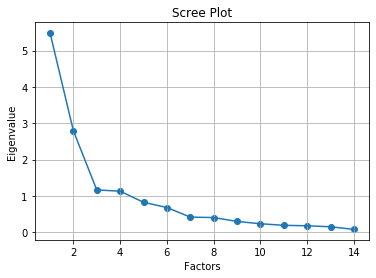

In [11]:
# Create scree plot using matplotlib
plt.scatter(range(1,df.shape[1]+1),eigen)
plt.plot(range(1,df.shape[1]+1),eigen)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [12]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer(6, rotation="varimax")
fa.fit(df)

FactorAnalyzer(bounds=(0.005, 1), impute='median', is_corr_matrix=False,
               method='minres', n_factors=6, rotation='varimax',
               rotation_kwargs={}, use_smc=True)

In [13]:
loadings=fa.loadings_
print(loadings)

[[-0.23428018  0.87462481 -0.12041462 -0.16881425  0.08358062 -0.15129605]
 [ 0.87952507 -0.14101952  0.09315974  0.01303184  0.16357061 -0.27347347]
 [ 0.83355656 -0.0654957   0.27236644  0.00250101  0.2883128   0.14052013]
 [ 0.01935905  0.07967338  0.01780845 -0.05994442  0.33749091  0.02654755]
 [-0.06494761  0.06962237 -0.57122301  0.08172191 -0.12118077  0.00790895]
 [ 0.73662818 -0.01884495  0.3232207  -0.27132488  0.34366097  0.13317124]
 [ 0.09457592  0.70146009  0.13118956 -0.16016288  0.03591512  0.16001227]
 [ 0.55176635  0.42981684  0.58540157 -0.21030841 -0.08609149  0.01011959]
 [ 0.86703488 -0.06575434 -0.11181605 -0.11692566  0.10267584  0.00594391]
 [-0.18480396 -0.30223425 -0.21963481  0.77973893 -0.0776454  -0.01544538]
 [ 0.62800301 -0.28764564  0.02165633  0.45881166 -0.00296486 -0.02153431]
 [ 0.60165409 -0.6507073   0.33649604  0.06317757 -0.0820115   0.01411816]
 [-0.3406057   0.13387948 -0.20457346 -0.21119752 -0.52484125  0.24465528]
 [ 0.72199095  0.12240164

In [14]:
# Get variance of each factors
fa.get_factor_variance()

(array([4.56343343, 2.11221883, 1.22853113, 1.06849122, 0.72294159,
        0.22342051]),
 array([0.32595953, 0.15087277, 0.08775222, 0.0763208 , 0.05163869,
        0.01595861]),
 array([0.32595953, 0.4768323 , 0.56458453, 0.64090533, 0.69254401,
        0.70850262]))

In [15]:
# Display 6 factors
pd.DataFrame.from_records(loadings)

,0,1,2,3,4,5
0,-0.234280,0.874625,-0.120415,-0.168814,0.083581,-0.151296
1,0.879525,-0.141020,0.093160,0.013032,0.163571,-0.273473
2,0.833557,-0.065496,0.272366,0.002501,0.288313,0.140520
3,0.019359,0.079673,0.017808,-0.059944,0.337491,0.026548
4,-0.064948,0.069622,-0.571223,0.081722,-0.121181,0.007909
5,0.736628,-0.018845,0.323221,-0.271325,0.343661,0.133171
6,0.094576,0.701460,0.131190,-0.160163,0.035915,0.160012
7,0.551766,0.429817,0.585402,-0.210308,-0.086091,0.010120
8,0.867035,-0.065754,-0.111816,-0.116926,0.102676,0.005944
9,-0.184804,-0.302234,-0.219635,0.779739,-0.077645,-0.015445
